<a href="https://colab.research.google.com/github/ErikRidhoFirm/PCVK_Ganjil_2025/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Mengakses gambar pada Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Transformasi Linier Brightness**

Formula: g(x,y)=f(x,y)+b

g(x,y) adalah nilai pixel setelah transformasi, f(x,y) adalah nilai pixel asli, b adalah nilai brightness.

 Mengubah tingkat kecerahan citra 
----------------------------------
Masukkan nilai kecerahan: 50


/tmp/ipython-input-2890478618.py:21: RuntimeWarning: overflow encountered in scalar add
  brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)


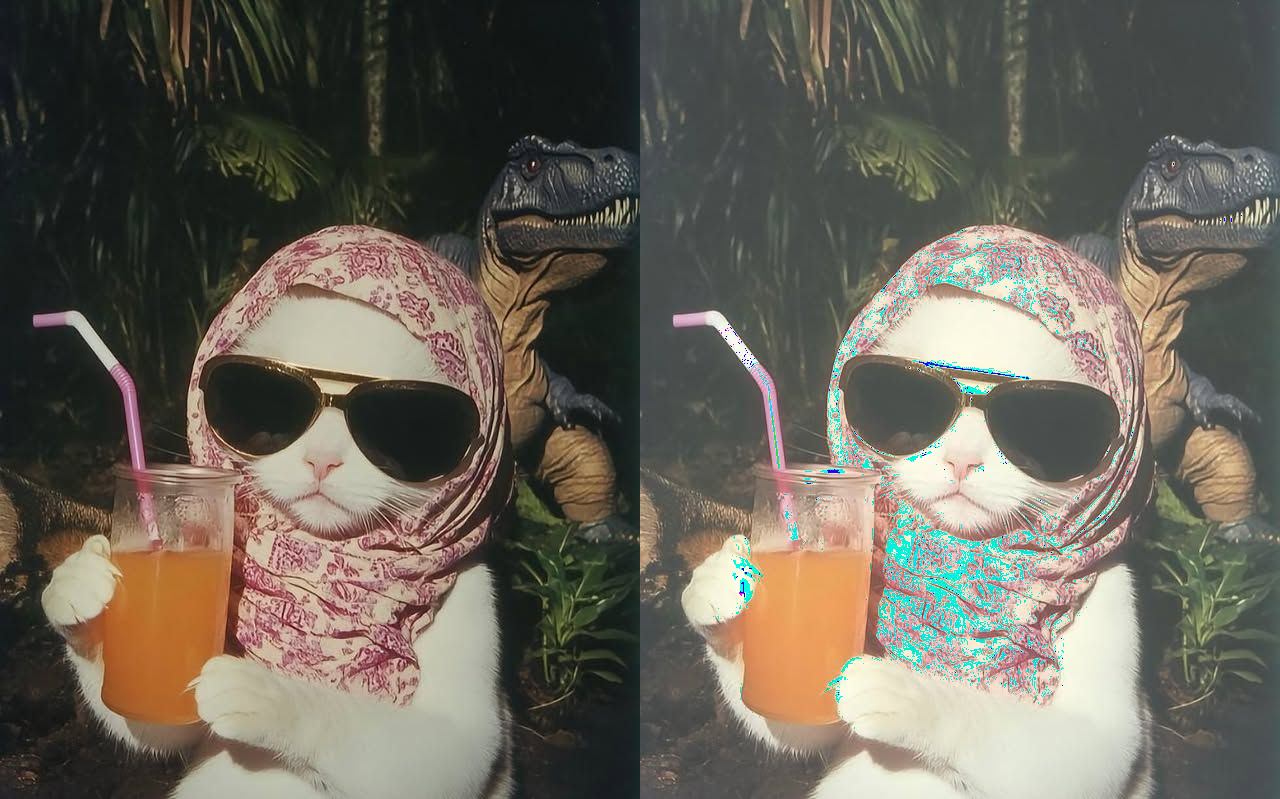

In [14]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

print(' Mengubah tingkat kecerahan citra ')
print('----------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/Images/cute_cat.jpeg')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

#cara simple tanpa for loop
#brightness_image = cv.convertScaleAbs(original, beta-brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

# **TUGAS PRAKTIKUM**

1. Implementasikan inverse citra pada Google Colaboratory menggunakan formula yang
terdapat pada bagian Ulasan Teori.

 Inverse Citra 
---------------


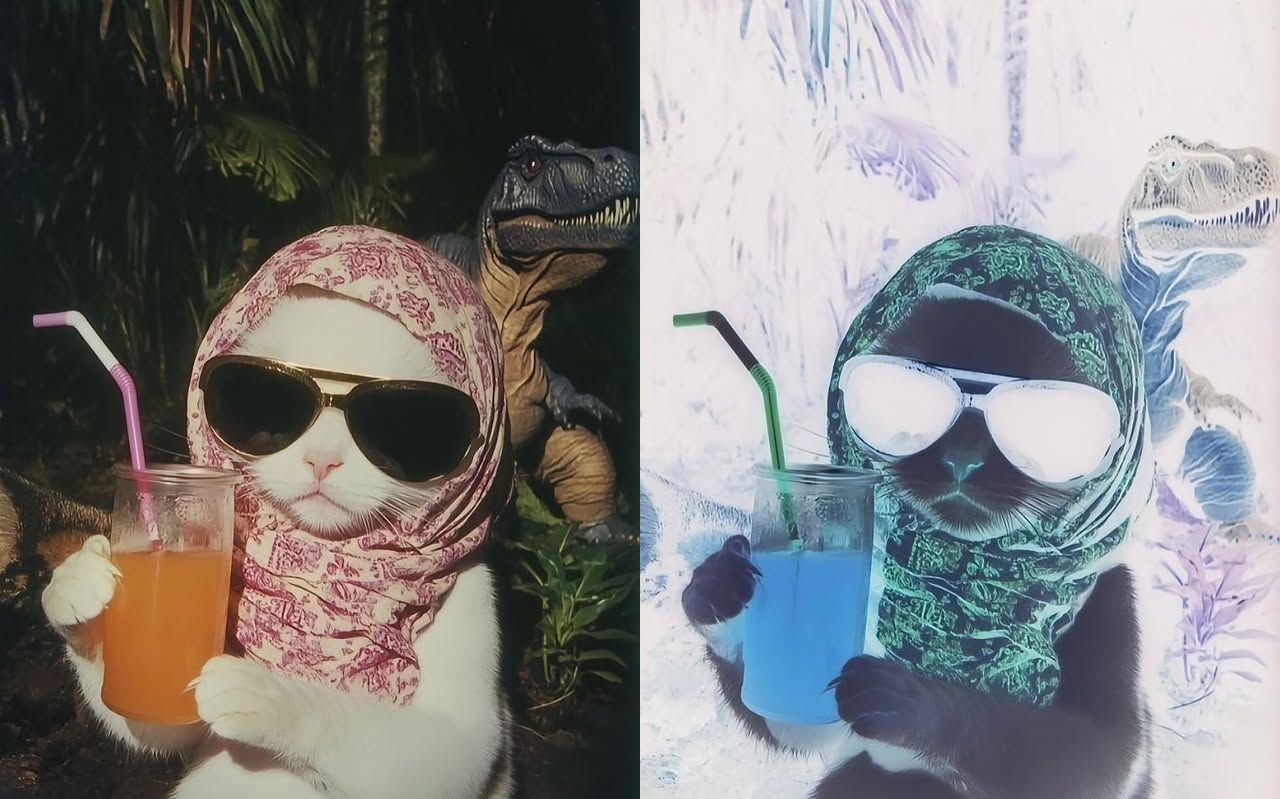

In [17]:
print(' Inverse Citra ')
print('---------------')

# Baca gambar dari Google Drive
original = cv.imread('/content/drive/MyDrive/PCVK/Images/cute_cat.jpeg')

# Buat array kosong dengan ukuran sama
inverse_image = np.zeros(original.shape, original.dtype)

# Akses per piksel (cara manual)
for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        for c in range(original.shape[2]):
            inverse_image[y, x, c] = 255 - original[y, x, c]

# Cara simple tanpa loop (cukup 1 baris)
# inverse_image = 255 - original

# Gabungkan citra asli dan inverse jadi satu frame
final_frame = cv.hconcat((original, inverse_image))
cv2_imshow(final_frame)


2. Implementasikan transformasi contrast pada Google Colaboratory menggunakan
formula yang terdapat pada bagian Ulasan Teori untuk kontras.

Mengubah kontras dan tingkat kecerahan citra
--------------------------------------------
Masukkan tingkat kecerahan [-255..255]: 50
Masukkan kontras [1.0..3.0]: 2


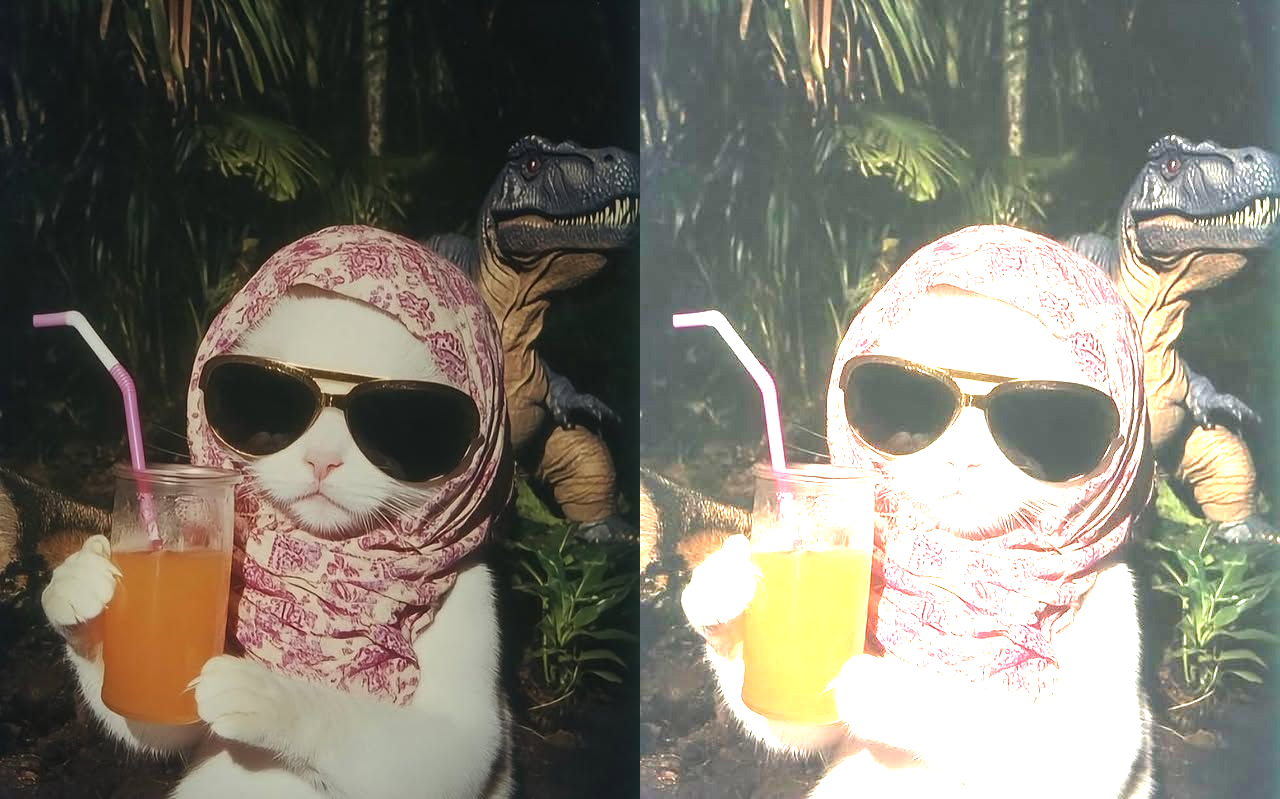

In [16]:
print("Mengubah kontras dan tingkat kecerahan citra")
print("--------------------------------------------")

# Input brightness dan contrast
try:
    brightness = int(input("Masukkan tingkat kecerahan [-255..255]: "))
    contrast = float(input("Masukkan kontras [1.0..3.0]: "))
except ValueError:
    print("Error: input tidak valid")
    brightness = 0
    contrast = 1.0

# Baca gambar dari drive
img = cv.imread('/content/drive/MyDrive/PCVK/Images/cute_cat.jpeg')

# Transformasi kontras & brightness
adjusted = cv.convertScaleAbs(img, alpha=contrast, beta=brightness)

# Gabungkan gambar asli dan hasil
final_frame = cv.hconcat((img, adjusted))
cv2_imshow(final_frame)


3. Implementasikan transformasi logarithmic brightness pada Google Colaboratory
menggunakan formula yang terdapat pada bagian Ulasan Teori untuk transformasi
log.

Mengubah tingkat kecerahan citra dengan Transformasi Log
--------------------------------------------------------
Masukkan nilai kecerahan: 50


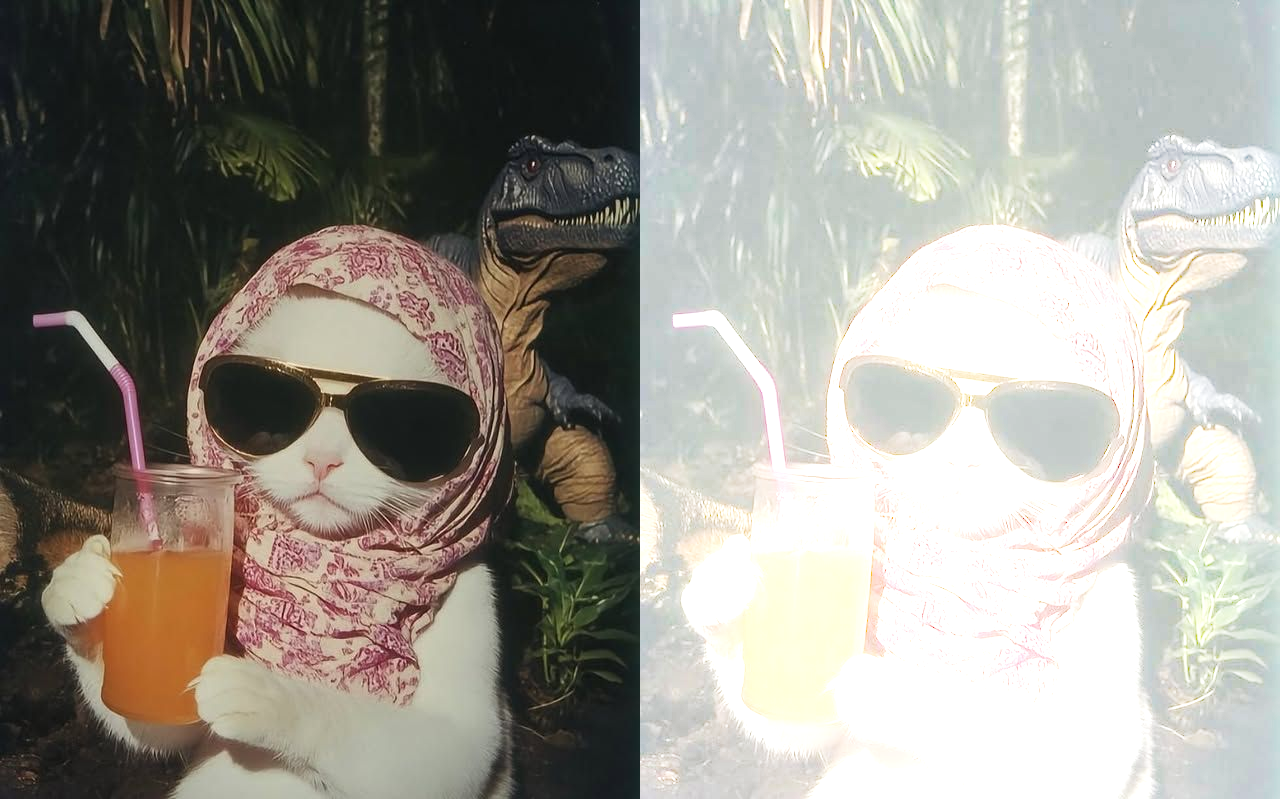

In [18]:
print("Mengubah tingkat kecerahan citra dengan Transformasi Log")
print("--------------------------------------------------------")

# Input faktor kecerahan tambahan
try:
    brightness = int(input("Masukkan nilai kecerahan: "))
except ValueError:
    print("Error: input harus berupa angka")
    brightness = 0

# Baca gambar dari Google Drive
img = cv.imread('/content/drive/MyDrive/PCVK/Images/cute_cat.jpeg')

# Konversi ke float agar log tidak error
img_float = img.astype(float)

# Konstanta skala log
c = 255 / np.log(1 + np.max(img_float))

# Transformasi log
log_transformed = c * (np.log(1 + img_float)) + brightness

# Normalisasi agar tetap di range [0,255]
log_transformed = np.clip(log_transformed, 0, 255).astype(np.uint8)

# Gabungkan gambar asli dan hasil
final_frame = cv.hconcat((img, log_transformed))
cv2_imshow(final_frame)


4. Implementasikan transformasi grayscale menggunakan metode averaging, lightness,
dan luminance pada Google Colaboratory menggunakan formula yang terdapat pada
bagian Ulasan Teori.

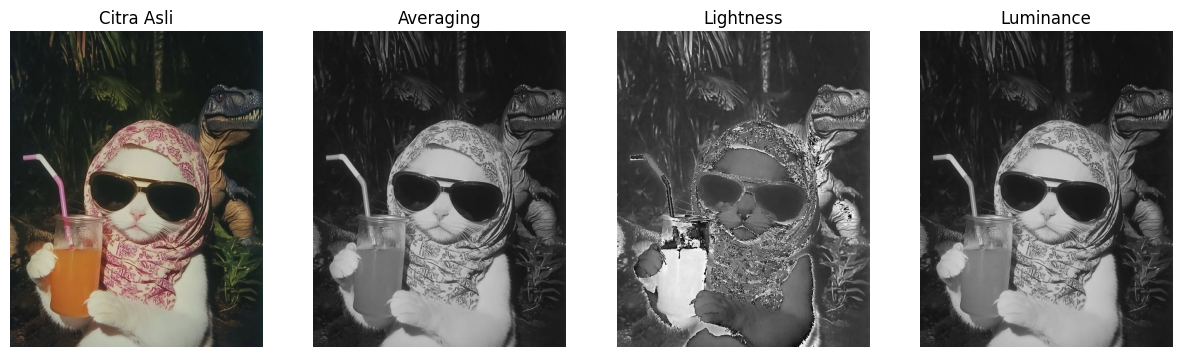

In [27]:
# Ambil gambar dari Google Drive
img = io.imread('/content/drive/MyDrive/PCVK/Images/cute_cat.jpeg')

# Transformasi Grayscale

# 1. Averaging
gray_avg = np.mean(img, axis=2).astype(np.uint8)

# 2. Lightness
gray_lightness = ((np.max(img, axis=2) + np.min(img, axis=2)) / 2).astype(np.uint8)

# 3. Luminance
gray_luminance = (0.299*img[:,:,0] + 0.587*img[:,:,1] + 0.114*img[:,:,2]).astype(np.uint8)

# Menampilkan hasil
fig, axs = plt.subplots(1,4, figsize=(15,5))

axs[0].imshow(img)
axs[0].set_title("Citra Asli")
axs[0].axis("off")

axs[1].imshow(gray_avg, cmap="gray")
axs[1].set_title("Averaging")
axs[1].axis("off")

axs[2].imshow(gray_lightness, cmap="gray")
axs[2].set_title("Lightness")
axs[2].axis("off")

axs[3].imshow(gray_luminance, cmap="gray")
axs[3].set_title("Luminance")
axs[3].axis("off")

plt.show()


5. Tampilkanlah warna tertentu pada citra, dan ubah warna lain menjadi grayscale. Misal,
tampilkan warna biru pada citra masukan dan ubah bagian lain yang tidak berwarna
biru menjadi grayscale.

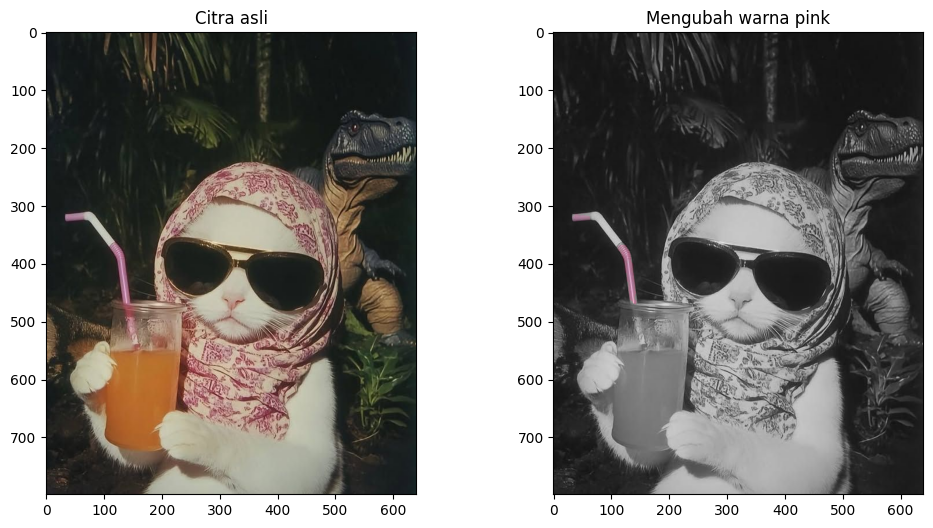

In [38]:
# Baca gambar
image_path = '/content/drive/MyDrive/PCVK/Images/cute_cat.jpeg'
img = cv.imread(image_path)
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Konversi ke HSV untuk segmentasi warna pink (ungu-merah muda)
hsv = cv.cvtColor(img_rgb, cv.COLOR_RGB2HSV)

# Rentang warna pink (bisa disesuaikan tergantung gambar)
lower_pink = np.array([140, 50, 50])
upper_pink = np.array([170, 255, 255])

# Masking warna pink
mask = cv.inRange(hsv, lower_pink, upper_pink)

# Buat grayscale
gray = cv.cvtColor(img_rgb, cv.COLOR_RGB2GRAY)
gray_rgb = cv.cvtColor(gray, cv.COLOR_GRAY2RGB)

# Gabungkan: area pink tetap berwarna, lainnya grayscale
result = gray_rgb.copy()
result[mask > 0] = img_rgb[mask > 0]

# Tampilkan hasil
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title("Citra asli")

plt.subplot(1, 2, 2)
plt.imshow(result)
plt.title("Mengubah warna pink")

plt.show()